In [1]:
import numpy as np

import keras


C:\Users\admin\Envs\deepvision\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
 
(pics, labels), _ = mnist.load_data()

## LET'S GET THE IMAGES READY FOR THE AI MODEL

In [3]:
print(pics.shape)

(60000, 28, 28)


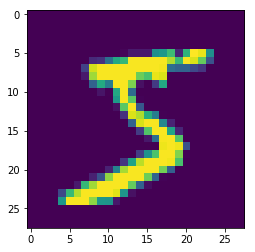

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(pics[0])

We need to flatten each "28 pixel x 28 pixel" matrix into a long list of pixel values.

In [5]:
pics = np.resize(pics, (60000, 784))
pics.shape

(60000, 784)

In [6]:
pics[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

As we can see, the greyscale image lists brightness from 0 to 255. 

Since we are going to be doing math with these pixels, we should make it more flexible by turning 0 - 255 into a decimal from 0.0000 to 1.0000:

In [7]:
pics = pics.astype('float32')
pics /= 255
pics.shape

(60000, 784)

In [8]:
pics[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## NOW LET'S 1_HOT_ENCODE THE LABELS FOR TRAINING

As we saw above, the first pic in the MNIST database was clearly a 5. Let's make sure that the first label says '5':

In [9]:
labels[0]

5

Since we are growing an A.I. model to make a prediction across all 10 digits, we need to one hot encode each label. Keras has a built in utility that will do this for us.

In [10]:
# NOW WE NEED TO ONE HOT ENCODE THE LABELS
from keras.utils import np_utils

labels = np_utils.to_categorical(labels, 10)
labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## NOW LET'S BUILD OUR MODEL

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

In [12]:
def TrainingLoop(number_of_epochs, verbose):
    model.fit(pics, labels, \
              batch_size=128, \
              epochs=number_of_epochs, \
              verbose=verbose, \
              validation_split=.1 )

TrainingLoop(10, 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 141us/step - loss: 0.2695 - acc: 0.9182 - val_loss: 0.0976 - val_acc: 0.9702
Epoch 2/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.1061 - acc: 0.9669 - val_loss: 0.0760 - val_acc: 0.9790
Epoch 3/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.0757 - acc: 0.9758 - val_loss: 0.0646 - val_acc: 0.9798
Epoch 4/10
54000/54000 [==============================] - 4s 71us/step - loss: 0.0579 - acc: 0.9820 - val_loss: 0.0706 - val_acc: 0.9792
Epoch 5/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.0467 - acc: 0.9853 - val_loss: 0.0697 - val_acc: 0.9817
Epoch 6/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.0398 - acc: 0.9869 - val_loss: 0.0617 - val_acc: 0.9838
Epoch 7/10
54000/54000 [==============================] - 4s 71us/step - loss: 0.0350 - acc: 0.9883 - val_loss: 0.0581 - val_acc

## LET'S VISUALLY VALIDATE OUR MODEL

In [13]:
test_image = pics[300]

test_image.shape

(784,)

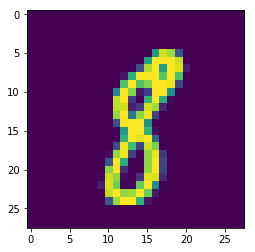

In [14]:
np.resize(test_image, (28, 28))
plt.imshow( np.resize(test_image, (28, 28)) )

In [15]:
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch.shape

(1, 784)

In [16]:
result = model.predict(test_image_batch, batch_size=1, verbose=1)
print(result)

1/1 [==============================] - 4s 4s/step
[[4.80685536e-08 1.50097810e-06 4.44500216e-07 6.63612752e-07
  1.59714894e-10 1.31232400e-06 2.84290387e-08 2.27004762e-08
  9.99995947e-01 1.26593225e-08]]


In [17]:
print(np.argmax(result, axis=1)[0])

8


In [18]:
model.save_weights('keras_digits.hd5')